#                                            VIDEO GAMES

Team members- 
    

* Supriya Tiwari - <stiwari3@scu.edu>
* Nivethitha Ramachandar -  <nramachandar@scu.edu>
* Zoey Zhang - <zzhang8@scu.edu>
* Bhawana Mohta - <bmohta@scu.edu>


The data can be obtained from the following URL - https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings 

![title](img/Video_Games.jpg)

# Introduction

Video games have always had a special place in our life. I'm pretty sure we've all played Video Games at some part of time in our lives and can all very well relate to it.
When we came across this dataset, we were very excited to analyze its data and see what the numbers and graphs had to say. 

In this project we will first give some basic visualisations, data cleaning and then move forward to the analyses and prediction model. 

#### Columns

* **Name**: Name of the game
* **Platform**: Console on which the game is running
* **Year_of_Release**: Year of the game released
* **Genre**: Game's category
* **Publisher**: Publisher
* **NA_Sales**: Game sales in North America (in millions of units)
* **EU_Sales**: Game sales in the European Union (in millions of units) 
* **JP_Sales**: Game sales in Japan (in millions of units)
* **Other_Sales**: Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding the E.U. and South America (in millions of units)
* **Global_Sales**: Total sales in the world (in millions of units)
* **Critic_Score**: Aggregate score compiled by Metacritic staff
* **Critic_Count**: The number of critics used in coming up with the Critic_score
* **User_Score**: Score by Metacritic's subscribers
* **User_Count**: Number of users who gave the user_score
* **Developer**: Party responsible for creating the game
* **Rating**: The ESRB ratings (E.g. Everyone, Teen, Adults Only..etc)

In [149]:
#Importing the necessary libraries
import numpy as np 
import pandas as pd  
import seaborn as sns
import plotly as py
import plotly.graph_objects as go

import calendar
from datetime import datetime
from pandas import Series
from math import ceil

import matplotlib.patches as mpatches

from matplotlib import pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [150]:
#Loading the data
vg = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
#Checking what the dataset looks like
vg.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<font size = 5> Data Cleaning

In [151]:
#Short summary of dataframe
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [152]:
#shape of the dataframe
vg.shape

(16719, 16)

In [153]:
#Checking for NA values
vg.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [154]:
#dropping the NA values
vg1=vg.dropna().reset_index(drop=True)

In [155]:
#check shape of the dataframe
vg1.shape

(6825, 16)

In [156]:
#check for null values now
vg1.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [157]:
#picking the important columns 
vg1=vg1[['Name','Platform','Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'
       , 'Global_Sales', 'Critic_Score', 'Developer', 'User_Count', 'Rating' ]]

In [158]:
vg1['Year_of_Release'] = vg1['Year_of_Release'].apply(int)

In [159]:
vg1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,Nintendo,322.0,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,Nintendo,709.0,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,Nintendo,192.0,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,Nintendo,431.0,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,Nintendo,129.0,E


 We will check general statistics on sales across the different regions and global sales.

In [160]:
#Descriptive statistics
vg1.loc[:,'NA_Sales':'Global_Sales'].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,0.394484,0.236089,0.064158,0.082677,0.777590
std,0.967385,0.687330,0.287570,0.269871,1.963443
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.060000,0.020000,0.000000,0.010000,0.110000
50%,0.150000,0.060000,0.000000,0.020000,0.290000
75%,0.390000,0.210000,0.010000,0.070000,0.750000
max,41.360000,28.960000,6.500000,10.570000,82.530000


From this information we can see that North America makes most of the video game sales.

Next we are going to see what the top 25 all-time best-selling games are.

In [161]:
#Top 25 best-selling video games by global sales copies
vg1.groupby(['Name']).sum()['Global_Sales'].sort_values(ascending=False)[:25]

Name
Wii Sports                                      82.53
Grand Theft Auto V                              56.57
Mario Kart Wii                                  35.52
Wii Sports Resort                               32.77
Call of Duty: Modern Warfare 3                  30.59
New Super Mario Bros.                           29.80
Call of Duty: Black Ops II                      29.40
Call of Duty: Black Ops                         29.19
Wii Play                                        28.92
New Super Mario Bros. Wii                       28.32
Call of Duty: Ghosts                            26.70
Call of Duty: Modern Warfare 2                  24.95
Grand Theft Auto: San Andreas                   23.73
Mario Kart DS                                   23.21
Wii Fit                                         22.70
Grand Theft Auto IV                             22.39
Kinect Adventures!                              21.81
Wii Fit Plus                                    21.79
Brain Age: Train Your B

# 1. Analysis on which platform is the best!

For the longest time, people have debated which console was better- which one of the 3-<font size="3"> Wii, PS3 and X360 </font>?. These long late night debates have raged on from middle school and we want to put an end to them once and for all. From arguing about the console specs, to the games, to the feel of the controller, to any other insignificant detail- we have done it all.

We wanted to take an analytical approach. Forget the "emotional battles", lets look at the raw stats and see which console performed better.

Firstly we checked the global sales of the three over the years. Then we checked the total sales and total users of the three platforms. 

Let's see what the results say...

In [162]:
# Dataframe containing info of the three platforms- Wii, PS3, X360
video7th = vg1[(vg1['Platform'] == 'Wii') | (vg1['Platform'] == 'PS3') | (vg1['Platform'] == 'X360')]
video7th.shape

(2106, 14)

<font size= 4> GLOBAL SALES OVER THE YEARS </fontsize>

First let's look at these console's global sales over the years and see if we can identify any which one left with bragging rights. To do so, I shall aggregate the data via a "groupby" call on the "Year_of_Release" and "Platform" and then sum the Global_Sales. For visualisation, we will plot stacked barplots and hopefully this will be intuitive enough.

Text(0, 0.5, 'Global Sales')

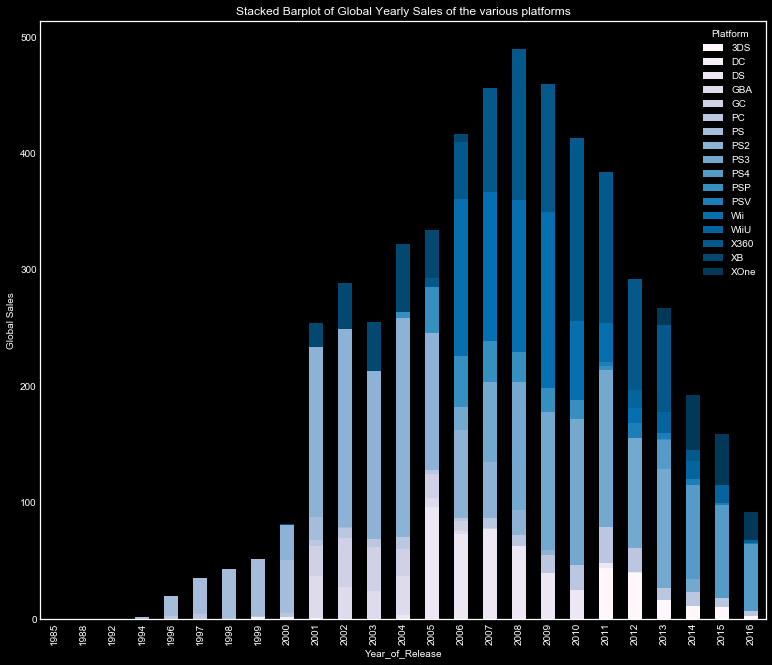

In [163]:
#Firstly, we will check the year wise sales of the various platforms
plt.style.use('dark_background')
yearlySales = vg1.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu',  
                           grid=False,  figsize=(13,11))
plt.title('Stacked Barplot of Global Yearly Sales of the various platforms')
plt.ylabel('Global Sales')

We will now jump in and look closely at the global sales of Wii, X360 and PS3 specifically.

Text(0, 0.5, 'Global Sales')

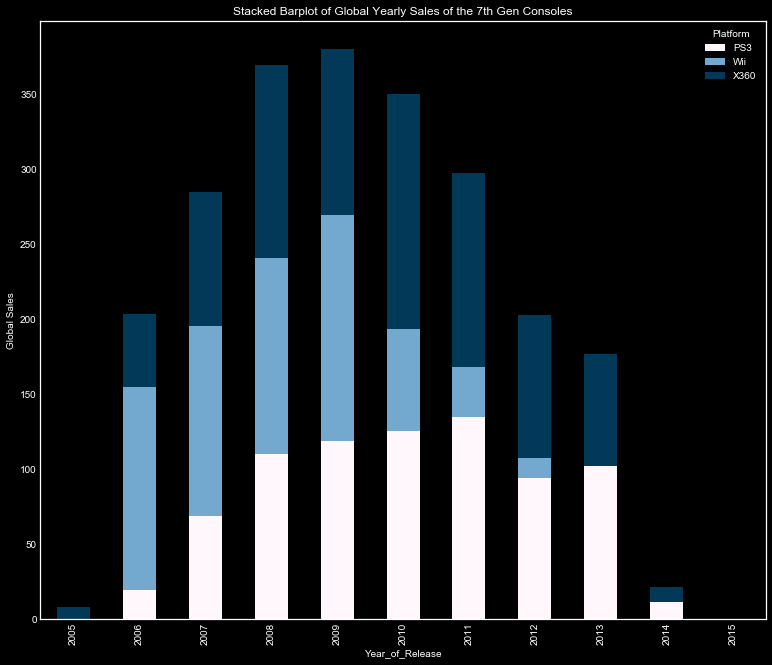

In [164]:
#Check the year wise sales of Wii, X360 and Wii and visualise it
plt.style.use('dark_background')
yearlySales = video7th.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu',  
                           grid=False,  figsize=(13,11))
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')

First Impressions : Seems like the PS3 sales went strong throughout , X360 sales (bar a dip in 2009) also generally increased while the Wii sales, which had a strong headstart in the early years of 2006 and 2007 had it's lead eroded by the other 2. We cannot conclude entirely by seeing this, so we will move forward and check the total sales and total users of the platforms.

<font size=4> TOTAL SALES AND TOTAL USERS



Let us look at pie chart visualisations of the total number of Global Sales and total number of users attributed to each of the 3 consoles. The way I am going to present this is to simply add up the Global sales and number of users value for all games. Therefore as a caveat, take the numbers and visualisation with a grain of salt as this output will be dependent on whether the original dataset was fully inclusive in the first instance.

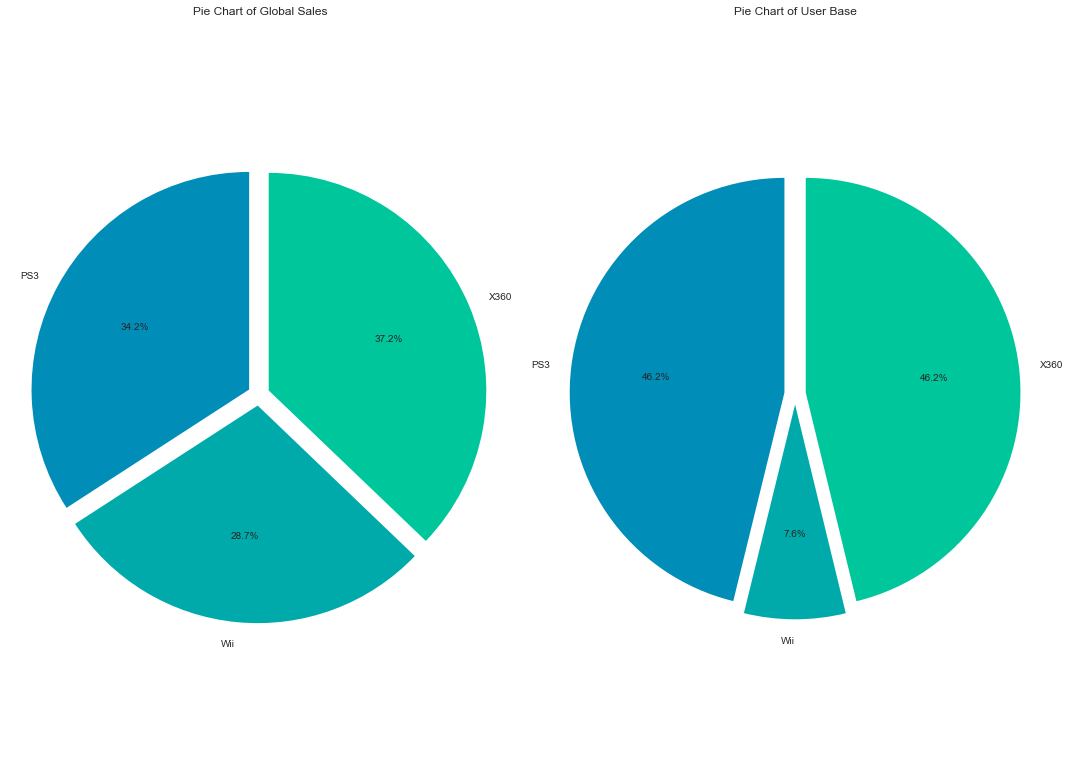

In [165]:
 #Plotting our pie charts
# Create a list of colors 
plt.style.use('seaborn-white')
colors = ['#008DB8','#00AAAA','#00C69C']
plt.figure(figsize=(15,11))
plt.subplot(121)
plt.pie(
   video7th.groupby('Platform').Global_Sales.sum(),
    # with the labels being platform
    labels=video7th.groupby('Platform').Global_Sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Global Sales')
plt.subplot(122)
plt.pie(
   video7th.groupby('Platform').User_Count.sum(),
    labels=video7th.groupby('Platform').User_Count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of User Base')
plt.tight_layout()
plt.show()

<font size=4> Conclusion: 

From the pie charts above as well as the earlier barplot, it seems that both the PS3 and the X360 were very evenly matched, with the X360 having the slight edge in global sales. What is obvious is that from these metrics alone, the showing from the Wii could not compete against its other 2 competitors clearly. 

WINNER : PS3 & X360 (Tie)


<font size = 5> Managerial insight : </font>

Finding out the most used platform, it can be easily used for planning out the the launch of a new video game! It would help in the sales of the video game if it was released on either one of PS3 or X360, being the most loved platform.  

# 2. Analysis of what is sold the best where?

For this we will check various sales of the platforms, genres and ratings in the various regions and come to our conclusions.

In [166]:
#We will check the sales of Wii, PS2, PS3, X360 and PC in the North America region, Europe region, Japan region, 
#  the other regions and also overall globally.
df=vg[vg['Platform'].isin(['Wii','PS2','PS3','X360','PC'])]
df_na=df[['Platform','NA_Sales']].groupby('Platform')['NA_Sales'].mean().reset_index()
df_eu=df[['Platform','EU_Sales']].groupby('Platform')['EU_Sales'].mean().reset_index()
df_jp=df[['Platform','JP_Sales']].groupby('Platform')['JP_Sales'].mean().reset_index()
df_global=df[['Platform','Global_Sales']].groupby('Platform')['Global_Sales'].mean().reset_index()
df_other=df[['Platform','Other_Sales']].groupby('Platform')['Other_Sales'].mean().reset_index()

trace1=go.Bar(x=df_na['Platform'],
             y=df_na['NA_Sales'],
             marker=dict(color='rgba(255,0,0,0.5)',
                        line=dict(color='rgb(0,0,0)',width=1.5)),
             name='NA Sales')

trace2=go.Bar(x=df_eu['Platform'],
             y=df_eu['EU_Sales'],
             marker=dict(color='rgba(0,255,0,0.5)',
                        line=dict(color='rgb(0,0,0)',width=1.5)),
             name='EU Sales')

trace3=go.Bar(x=df_jp['Platform'],
             y=df_jp['JP_Sales'],
             marker=dict(color='rgba(0,0,255,0.5)',
                        line=dict(color='rgb(0,0,0)',width=1.5)),
             name='JP Sales')

trace4=go.Bar(x=df_global['Platform'],
             y=df_global['Global_Sales'],
             marker=dict(color='rgba(139,69,19,0.5)',
                        line=dict(color='rgb(0,0,0)',width=1.5)),
             name='Global Sales')

trace5=go.Bar(x=df_other['Platform'],
             y=df_other['Other_Sales'],
             marker=dict(color='rgba(140,0,19,0.5)',
                        line=dict(color='rgb(0,0,0)',width=1.5)),
             name='Other Sales')

layout=go.Layout(title='Sales in various regions on different Platforms',
                xaxis=dict(title='Platforms'),
                yaxis=dict(title='Sales'),
                barmode='group')

fig=go.Figure(data=[trace1,trace2,trace3,trace4,trace5],layout=layout)
iplot(fig)

We can tell from this, that the sales of the most of the platforms are highest in NA region, followed by EU region.  

Sales in Japan are significantly less compared to sales in other regions, after all Japan is just a country while the other two are continents. Global sales of games on XBOX 360 are highest. I am sad for PC gamers. Surprisingly, it seems no one plays computer games in Japan, LOL. In EU, PS3 based games are sold the most. In Japan, PS2 based games are sold the most. While in NA, XBOX360 games are sold the most.

NA, EU and JP are the main regions where all the sales takes place. So, now, we will check on the basis of genre! We will see the rankings of the various genres as per sales in the regions!

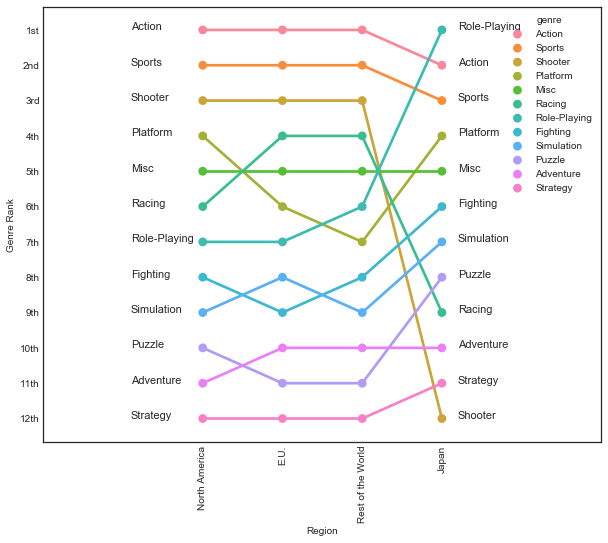

In [167]:
#Ranking the genres for the various regions as per their sales
genre_geography = [vg.groupby('Genre').sum().unstack().NA_Sales.sort_values(ascending=False).index, 
                      vg.groupby('Genre').sum().unstack().EU_Sales.sort_values(ascending=False).index,
                      vg.groupby('Genre').sum().unstack().Other_Sales.sort_values(ascending=False).index,
                      vg.groupby('Genre').sum().unstack().JP_Sales.sort_values(ascending=False).index
                      ]

#First is the number of releases per genre, second is the sales per genre, third is the average sales per game per genre
genre_geo_rank_df = pd.DataFrame(columns=['genre', 'rank_type', 'rank'])

#for metric in genre_difference_metric:
for region in range(4):
    for genre in range(len(genre_geography[region])):
        genre_geo_rank_df = genre_geo_rank_df.append({'genre':genre_geography[region][genre], 'rank_type': region, 'rank':genre},
                                   ignore_index=True)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.pointplot(x=genre_geo_rank_df.rank_type,
              y=12-genre_geo_rank_df['rank'], 
              hue=genre_geo_rank_df.genre)

for i in range(len(genre_geography[0])):
    ax.text(-0.9, 12-i, genre_geography[0][i], fontsize=11)
    ax.text(3.2, 12-i, genre_geography[3][i], fontsize=11)
    
ax.set_xlim([-2,5])

xs = [0.0, 1.0, 2.0, 3.0]
x_labels = ['North America', 'E.U.', 'Rest of the World', 'Japan']
plt.xticks(xs, x_labels, rotation='vertical')
ax.set_xlabel('Region')

ys = range(1,13)
y_labels = ['12th', '11th', '10th', '9th', '8th', '7th', '6th', '5th', '4th', '3rd', '2nd', '1st']
plt.yticks(ys, y_labels)
ax.set_ylabel('Genre Rank')

plt.show();

For NA and EU and rest of the world, the highest sales is that of the Action genre, whereas for Japan is Role playing. 

We will check the ratings for the videogames sales! The various ratings mean - 

E- Titles rated E (Everyone) have content that may be suitable for persons ages 6 and older. Titles in this category may contain minimal cartoon, fantasy or mild violence and/or infrequent use of mild language.

M- Titles rated M (Mature) have content that may be suitable for persons ages 17 and older. Titles in this category may contain intense violence, blood and gore, sexual content, and/or strong language.

T-Titles rated T (Teen) have content that may be suitable for ages 13 and older. Titles in this category may contain violence, suggestive themes, crude humor, minimal blood, simulated gambling, and/or infrequent use of strong language.

E10+- Titles rated E10+ (Everyone 10+) have content that may be suitable for ages 10 and older. Titles in this category may contain more cartoon, fantasy or mild violence, mild language, and/or minimal suggestive themes.

In [168]:
#Checking the sales of Videogames in regions on the basis of Ratings
df3=vg[vg['Rating'].isin(['E','M','T','E10+'])]
df_na=df3[['Rating','NA_Sales']].groupby('Rating')['NA_Sales'].mean().reset_index()
df_eu=df3[['Rating','EU_Sales']].groupby('Rating')['EU_Sales'].mean().reset_index()
df_jp=df3[['Rating','JP_Sales']].groupby('Rating')['JP_Sales'].mean().reset_index()
df_global=df3[['Rating','Global_Sales']].groupby('Rating')['Global_Sales'].mean().reset_index()

trace1=go.Bar(x=df_na['Rating'],
             y=df_na['NA_Sales'],
             marker=dict(color='rgba(128,0,0,0.5)',
                        line=dict(color='rgb(0,0,0)',width=1.5)),
             name='NA Sales')

trace2=go.Bar(x=df_eu['Rating'],
             y=df_eu['EU_Sales'],
             marker=dict(color='rgba(255,215,0,0.5)',
                        line=dict(color='rgb(0,0,0)',width=1.5)),
             name='EU Sales')

trace3=go.Bar(x=df_jp['Rating'],
             y=df_jp['JP_Sales'],
             marker=dict(color='rgba(85,107,47,0.5)',
                        line=dict(color='rgb(0,0,0)',width=1.5)),
             name='JP Sales')

trace4=go.Bar(x=df_global['Rating'],
             y=df_global['Global_Sales'],
             marker=dict(color='rgba(0,0,205,0.5)',
                        line=dict(color='rgb(0,0,0)',width=1.5)),
             name='Global Sales')

layout=go.Layout(title='Sales in various regions in different Ratings',
                xaxis=dict(title='Ratings'),
                yaxis=dict(title='Sales'),
                barmode='group')

fig=go.Figure(data=[trace1,trace2,trace3,trace4],layout=layout)
iplot(fig)

The highest sales for NA and EU is of rating M and that for Japan is T. 

<font size=4>Conclusion:



We can conclude that X360, Wii and PS3 is sold the most in the majority of the regions. NA and EU prefer Action based based games the most, which probably leads to the maximum sales of M rating in those regions, i.e, mature which may contain intense violence, blood and gore!

Japan has a different preference altogether! The highest sales in platform for them is PS2. They prefer the Role playing genre the most and T(Teen) rated games are sold the most.



<font size = 5> Managerial insight : </font>

Knowing the taste of the audience is extremely important for the design of a product. Knowing what kind of games are sold the best in which regions could give an important vision for planning ahead. 

# 3. Which games will be a hit in 2016? - Prediction

For our ML model we will perdict if a game that's released in 2016 would be a hit, we will predict the probability that a game will become a hit and tabulate the top 10 games and to maintain balance in this, we will also list out the bottom 10 games!

In [169]:
vg_ml = vg

In [170]:
# copy and last 5 rows
vg_ml = vg_ml.copy()
vg_ml[:5]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
# taking columns and enumerating each field
cols = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
for col in cols:
    uniques = df[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1
    for k, v in uniques_dict.items():
        vg.loc[vg[col] == k, col] = v

In [172]:
# drop NA for these fields
vg_ml_ref = vg[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
vg_ml_ref = vg_ml_ref.dropna().reset_index(drop=True)
#vg_ml_ref = vg_ml_ref.astype('float64')

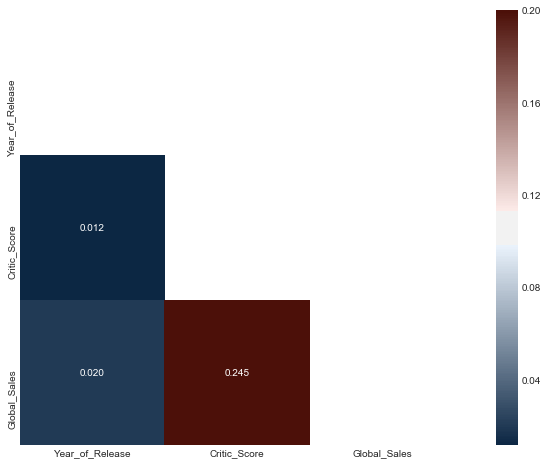

In [173]:
#Return an array of zeros with the same shape and type as a given array.

mask = np.zeros_like(vg_ml_ref.corr())
#np.triu_indices_from(mask) return the upper triangle of the corr matrix
mask[np.triu_indices_from(mask)] = True

# Make a diverging palette between two HUSL colors
cmap = sns.diverging_palette(250, 15, sep=20, as_cmap=True, s=85, l=15, n=20) # note: 680, 350/470
with sns.axes_style("white"):
    fig, ax = plt.subplots(1,1, figsize=(15,8))
    ax = sns.heatmap(vg_ml_ref.corr(), mask=mask, vmax=0.2, square=True, annot=True, fmt=".3f", cmap=cmap)
    ax.set_ylim([3,0])

<font size=3> Strongest correlations are: </font>

Critic scores-to-global sales: We'll take a closer look at this below.

Year of release-to-platform: This makes sense since new platforms come out periodically.

[(0, 17.5)]

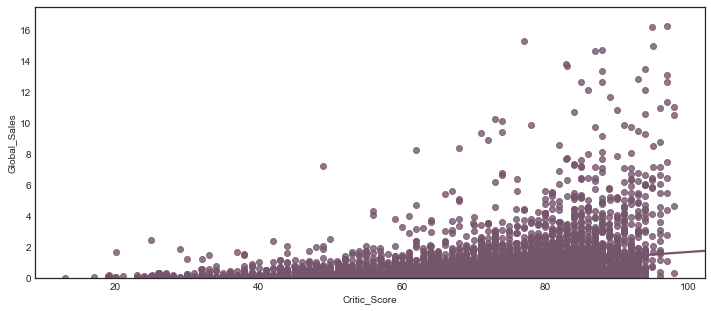

In [174]:
#checking critic score and global sales relation
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=vg_ml_ref, ci=None, color="#75556c", x_jitter=.02).set(ylim=(0, 17.5))

[(0, 4), (50, 95)]

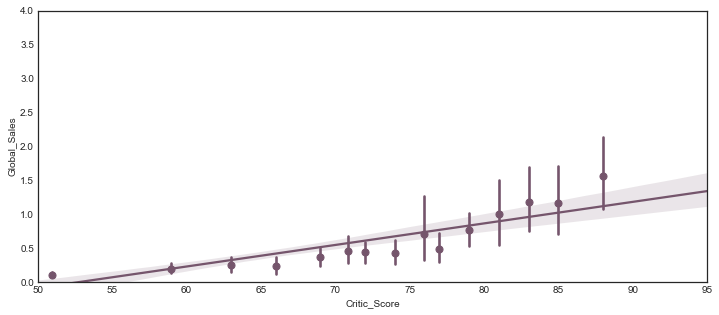

In [175]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=vg_ml_ref.loc[vg_ml_ref.Year_of_Release >= 2014],
            truncate=True, x_bins=15, color="#75556c").set(ylim=(0, 4), xlim=(50, 95))

Now that we have drawn the graph with the deviations the relationship looks much clearer now. It's interesting how the slope gets steeper in the 80's. It seems once a game gets a high critic score, every additional point has a higher impact.

Go big or go home, correct?

Looks like critic scores will be a good feature for the prediction model.

For the preparation we will add a few columns like Hit for example, it is 1 when our global sales crosses a million, not a great number when compared to how many people play video games, but a good benchmark!
We will also drop the NA's

In [176]:
vg_ml_test = vg_ml[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
vg_ml_test = vg_ml_test.dropna().reset_index(drop=True)
vg_ml_test2 = vg_ml_test[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
# renaming Global_Sales as Hit in the new data frame
vg_ml_test2['Hit'] = vg_ml_test2['Global_Sales']
vg_ml_test2.drop('Global_Sales', axis=1, inplace=True)

In [177]:
# sales is 1 if its not 0.
def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0
# Applying to all rows
vg_ml_test2['Hit'] = vg_ml_test2['Hit'].apply(lambda x: hit(x))

In [178]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm

In [179]:
#import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [180]:
vg_ml_test2[:5]

,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Hit
0,Wii,Sports,Nintendo,2006.0,76.0,1
1,Wii,Racing,Nintendo,2008.0,82.0,1
2,Wii,Sports,Nintendo,2009.0,80.0,1
3,DS,Platform,Nintendo,2006.0,89.0,1
4,Wii,Misc,Nintendo,2006.0,58.0,1


In [181]:
from pandas import get_dummies
# we are converting the categorical variable into dummy numeric for our model
df_copy = pd.get_dummies(vg_ml_test2)

In [182]:
df_copy[:5]

,Year_of_Release,Critic_Score,Hit,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,...,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yuke's,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software,Publisher_inXile Entertainment
0,2006.0,76.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008.0,82.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2009.0,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2006.0,89.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006.0,58.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
# y as Hit and x all values for the data frame except Hit
vg_ml_test3 = df_copy
y = vg_ml_test3['Hit'].values
vg_ml_test3 = vg_ml_test3.drop(['Hit'],axis=1)
X = vg_ml_test3.values

Let us have our train and test split

In [184]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

We thought of doing two models with the split and check whichever gave a nice predictive score, we used logistic regression adn a random forest classifier, two models, one in classification and one in regression.

Now while classification finds multiple categorical classes for the model, regression is the process of finding a model or function for distinguishing the data into continuous real values instead of using classes or discrete values

In [185]:
log_reg = LogisticRegression().fit(Xtrain, ytrain)
y_val_2 = log_reg.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_2).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.8602204408817635


In [186]:
radm = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)
y_val_1 = radm.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_1).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.8547094188376754


Let us do a simple K fold cross validation for the model we did above, the accuracy of the model and the simple standard deviation

In [187]:
from sklearn.utils import shuffle
X_shuf, y_shuf = shuffle(X, y)

In [188]:
#kfold cross validation
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 81.16% (30.95%)


Logistic Regression for the win! We will now have our confusion matrix!

In [189]:
all_predictions = log_reg.predict(Xtest)
print(classification_report(ytest, all_predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1644
           1       0.70      0.36      0.47       352

    accuracy                           0.86      1996
   macro avg       0.79      0.66      0.70      1996
weighted avg       0.85      0.86      0.84      1996



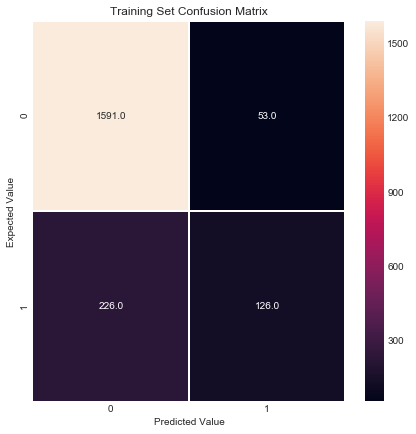

In [190]:
# here is the confusion matrix of our prediction model

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix(ytest, all_predictions), annot=True, linewidths=.5, ax=ax, fmt="0.1f").set(xlabel='Predicted Value', ylabel='Expected Value')
ax.set_ylim([2,0])
plt.title('Training Set Confusion Matrix')
plt.show()

True positive- 1591

True negative- 126

False positive- 53

False negative- 226

In [191]:
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking

# we are printing the feature importance using the forest of trees which shows us which of thr feautures are
# legit important


print('Feature ranking (top 10):')

for f in range(10):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], vg_ml_test3.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

Feature ranking (top 10):
1. feature 1 Critic_Score (0.351612)
2. feature 0 Year_of_Release (0.162472)
3. feature 216 Publisher_Nintendo (0.024828)
4. feature 19 Genre_Action (0.022238)
5. feature 27 Genre_Shooter (0.019954)
6. feature 29 Genre_Sports (0.018184)
7. feature 99 Publisher_Electronic Arts (0.017755)
8. feature 7 Platform_PC (0.017223)
9. feature 42 Publisher_Activision (0.016570)
10. feature 10 Platform_PS3 (0.015380)


In [192]:
# get all rows where sales(Hit) are 0
not_hit_copy = df_copy[df_copy['Hit'] == 0]

In [193]:
# y as Hit and x all values for the data frame except Hit
vg_ml_test4 = not_hit_copy
y = vg_ml_test4['Hit'].values
vg_ml_test4 = vg_ml_test4.drop(['Hit'],axis=1)
X = vg_ml_test4.values

In [194]:
pred = log_reg.predict_proba(X)

In [195]:
vg_ml_test = vg_ml_test[vg_ml_test['Global_Sales'] < 1]

In [196]:
vg_ml_test['Hit_Probability'] = pred[:,1]

In [197]:
vg_ml_test = vg_ml_test[vg_ml_test['Year_of_Release'] == 2016]
vg_ml_test.sort_values(['Hit_Probability'], ascending=[False], inplace=True)
vg_ml_test = vg_ml_test[['Name', 'Platform', 'Hit_Probability']]

In [198]:
vg_ml_test[:10].reset_index(drop=True) #these are the top 10

,Name,Platform,Hit_Probability
0,Titanfall 2,PS4,0.814973
1,Titanfall 2,XOne,0.712812
2,BioShock The Collection,PS4,0.670328
3,Plants vs. Zombies: Garden Warfare 2,PS4,0.669022
4,Dishonored 2,PS4,0.640676
5,Skylanders Imaginators,PS4,0.605737
6,Kirby: Planet Robobot,3DS,0.586207
7,BioShock The Collection,XOne,0.581959
8,Plants vs. Zombies: Garden Warfare 2,XOne,0.556645
9,Fast Racing Neo,WiiU,0.554140


Titanfall 2 did indeed win the best action game award

In [199]:
vg_ml_test[:-11:-1].reset_index(drop=True) # the bottom 10

,Name,Platform,Hit_Probability
0,Bus Simulator 16,PC,0.001363
1,RollerCoaster Tycoon World,PC,0.001826
2,Dino Dini's Kick Off Revival,PS4,0.002064
3,The Technomancer,PC,0.002448
4,Sherlock Holmes: The Devil's Daughter,PC,0.003144
5,Agatha Christie: The ABC Murders,PC,0.003322
6,Dead or Alive Xtreme 3: Fortune,PS4,0.003425
7,Pro Cycling Manager 2016,PC,0.003487
8,Pro Evolution Soccer 2017,PC,0.003558
9,Battle Worlds: Kronos,PC,0.003622


Interesting to note that 80% of these are PC games, no wonder the big guns are the PS4, they sure know how to do their business!

<font size = 5> Managerial insight : </font>

Our prediction model for the top 10 videogames can revitalize and contribute clear information to decision making. From a platform owner perspective, we could invest heavily in the advertisements of the highest hit probability games to furthermore increase sales. 

# CONCLUSION : 

We analyzed Videogames thoroughly and came to some cool conclusions and outcomes! We managed to compare PS3, X360 and Wii to see which one is better(well as per facts atleast). We even figured how the taste of EU, JP and NA varied. We then predicted the hit probablity of games for 2016. We got the top 10 and the bottom 10 for this with an accuracy of 86% for our Logistic Regression Classifier. 

<font size = 5 > References : </font>

https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
https://www.forbes.com/sites/erikkain/2017/01/10/the-10-best-video-games-of-2016/#8b7414c25426
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
https://towardsdatascience.com/@williamkoehrsen
https://www.kaggle.com/maxkliment/video-games-predicting-global-sales

https://github.com/duytinvo/sagemaker_examples/blob/ee5e66f159076112fa4e21597bc14caeaf7ac919/introduction_to_applying_machine_learning/video_game_sales/video-game-sales-xgboost.ipynb
https://www.kaggle.com/shanvith/data-storytelling-console-wars-ps3-vs-xbox-360/data
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
https://www.geeksforgeeks.org/ml-classification-vs-regression/
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://www.geeksforgeeks.org/decision-tree-implementation-python/

https://github.com/denisvrdoljak/MSIS2607_Winter2020/blob/master/week7material/classification_for_prediction/classification_for_prediction.ipynb

https://www.udemy.com/course/a-gentle-introduction-to-machine-learning-using-scikit-learn/learn/lecture/6681108#overview

https://www.kaggle.com/chrstnzhong/video-game-sales-analysis-genre-and-publisher/data
https://www.kaggle.com/oalvay/a-tale-of-video-games-will-the-sun-rise-again
https://scikit-learn.org/stable/modules/tree.html
https://python-graph-gallery.com/111-custom-correlogram/
http://holoviews.org/user_guide/Colormaps.html
https://www.youtube.com/watch?v=TIgfjmp-4BA
https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners
https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/